In [6]:
import pandas as pd
import numpy as np
import wrangle_zillow as wrangle
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# feature selection:
from sklearn.feature_selection import SelectKBest, RFE, f_regression

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [7]:
zillow = pd.read_csv('zillow.csv')

In [10]:
zillow.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.00,0.00,NaN,27516.00,NaN,NaN,LA
1,0.00,0.00,NaN,10.00,NaN,NaN,LA
2,0.00,0.00,NaN,10.00,NaN,NaN,LA
3,0.00,0.00,NaN,2108.00,NaN,174.21,LA
4,4.00,2.00,3633.00,296425.00,2005.00,6941.39,LA


In [4]:
train, validate, test = wrangle.prepare_zillow(zillow)

In [5]:
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [6]:
train['age'] = 2017 - train.year_built
validate['age'] = 2017 - validate.year_built
test['age'] = 2017 - test.year_built

In [7]:
train = train.sample(1000, random_state=12)
validate = validate.sample(100, random_state=12)
test = test.sample(100, random_state=12)

In [8]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips', 'age'],
      dtype='object')

In [9]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
1158290,3.00,2.00,1612.00,518016.00,1955.00,6567.84,6037.00,62.00
644231,4.00,2.00,1805.00,573616.00,1972.00,6843.24,6059.00,45.00
1459488,2.00,1.00,1218.00,182417.00,1951.00,2680.17,6037.00,66.00
2149989,3.00,2.50,1885.00,358469.00,1965.00,4410.72,6059.00,52.00
185697,3.00,2.00,1477.00,229000.00,1994.00,3575.09,6037.00,23.00


In [10]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test, columns_to_scale=['area','age'])

In [11]:
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value
X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [12]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:22<00:00,  1.89it/s]


In [13]:
print(models)

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
GradientBoostingRegressor                    0.96       0.96    37551.85   
LGBMRegressor                                0.95       0.96    37923.18   
HistGradientBoostingRegressor                0.95       0.96    38110.74   
XGBRegressor                                 0.95       0.95    39236.42   
ExtraTreesRegressor                          0.95       0.95    39249.84   
RANSACRegressor                              0.95       0.95    39286.50   
HuberRegressor                               0.95       0.95    39870.70   
TransformedTargetRegressor                   0.95       0.95    39979.66   
LinearRegression                             0.95       0.95    39979.66   
BayesianRidge                                0.95       0.95    39979.82   
Lasso                                        0.95       0.95    39979.83   
Ridge       

In [14]:
X_train_scaled = train_scaled.drop(columns=['tax_value'])
y_train_scaled = train_scaled.tax_value
X_test_scaled = test_scaled.drop(columns=['tax_value'])
y_test_scaled = test_scaled.tax_value

In [15]:
reg = LazyRegressor(predictions=True)
models_scaled, predictions_scaled = reg.fit(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:27<00:00,  1.54it/s]


In [16]:
print(models_scaled)

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
GradientBoostingRegressor                    0.96       0.96    37551.85   
LGBMRegressor                                0.95       0.96    37923.18   
HistGradientBoostingRegressor                0.95       0.96    38110.74   
XGBRegressor                                 0.95       0.95    39236.42   
ExtraTreesRegressor                          0.95       0.95    39249.84   
RANSACRegressor                              0.95       0.95    39286.50   
HuberRegressor                               0.95       0.95    39870.70   
LinearRegression                             0.95       0.95    39979.66   
TransformedTargetRegressor                   0.95       0.95    39979.66   
Lars                                         0.95       0.95    39979.66   
BayesianRidge                                0.95       0.95    39979.82   
Lasso       

In [17]:
evaluate.select_kbest(X_train,y_train,k=2)

['area', 'taxamount']

In [22]:
evaluate.rfe(X_train,y_train,k=2)

['year_built', 'age']

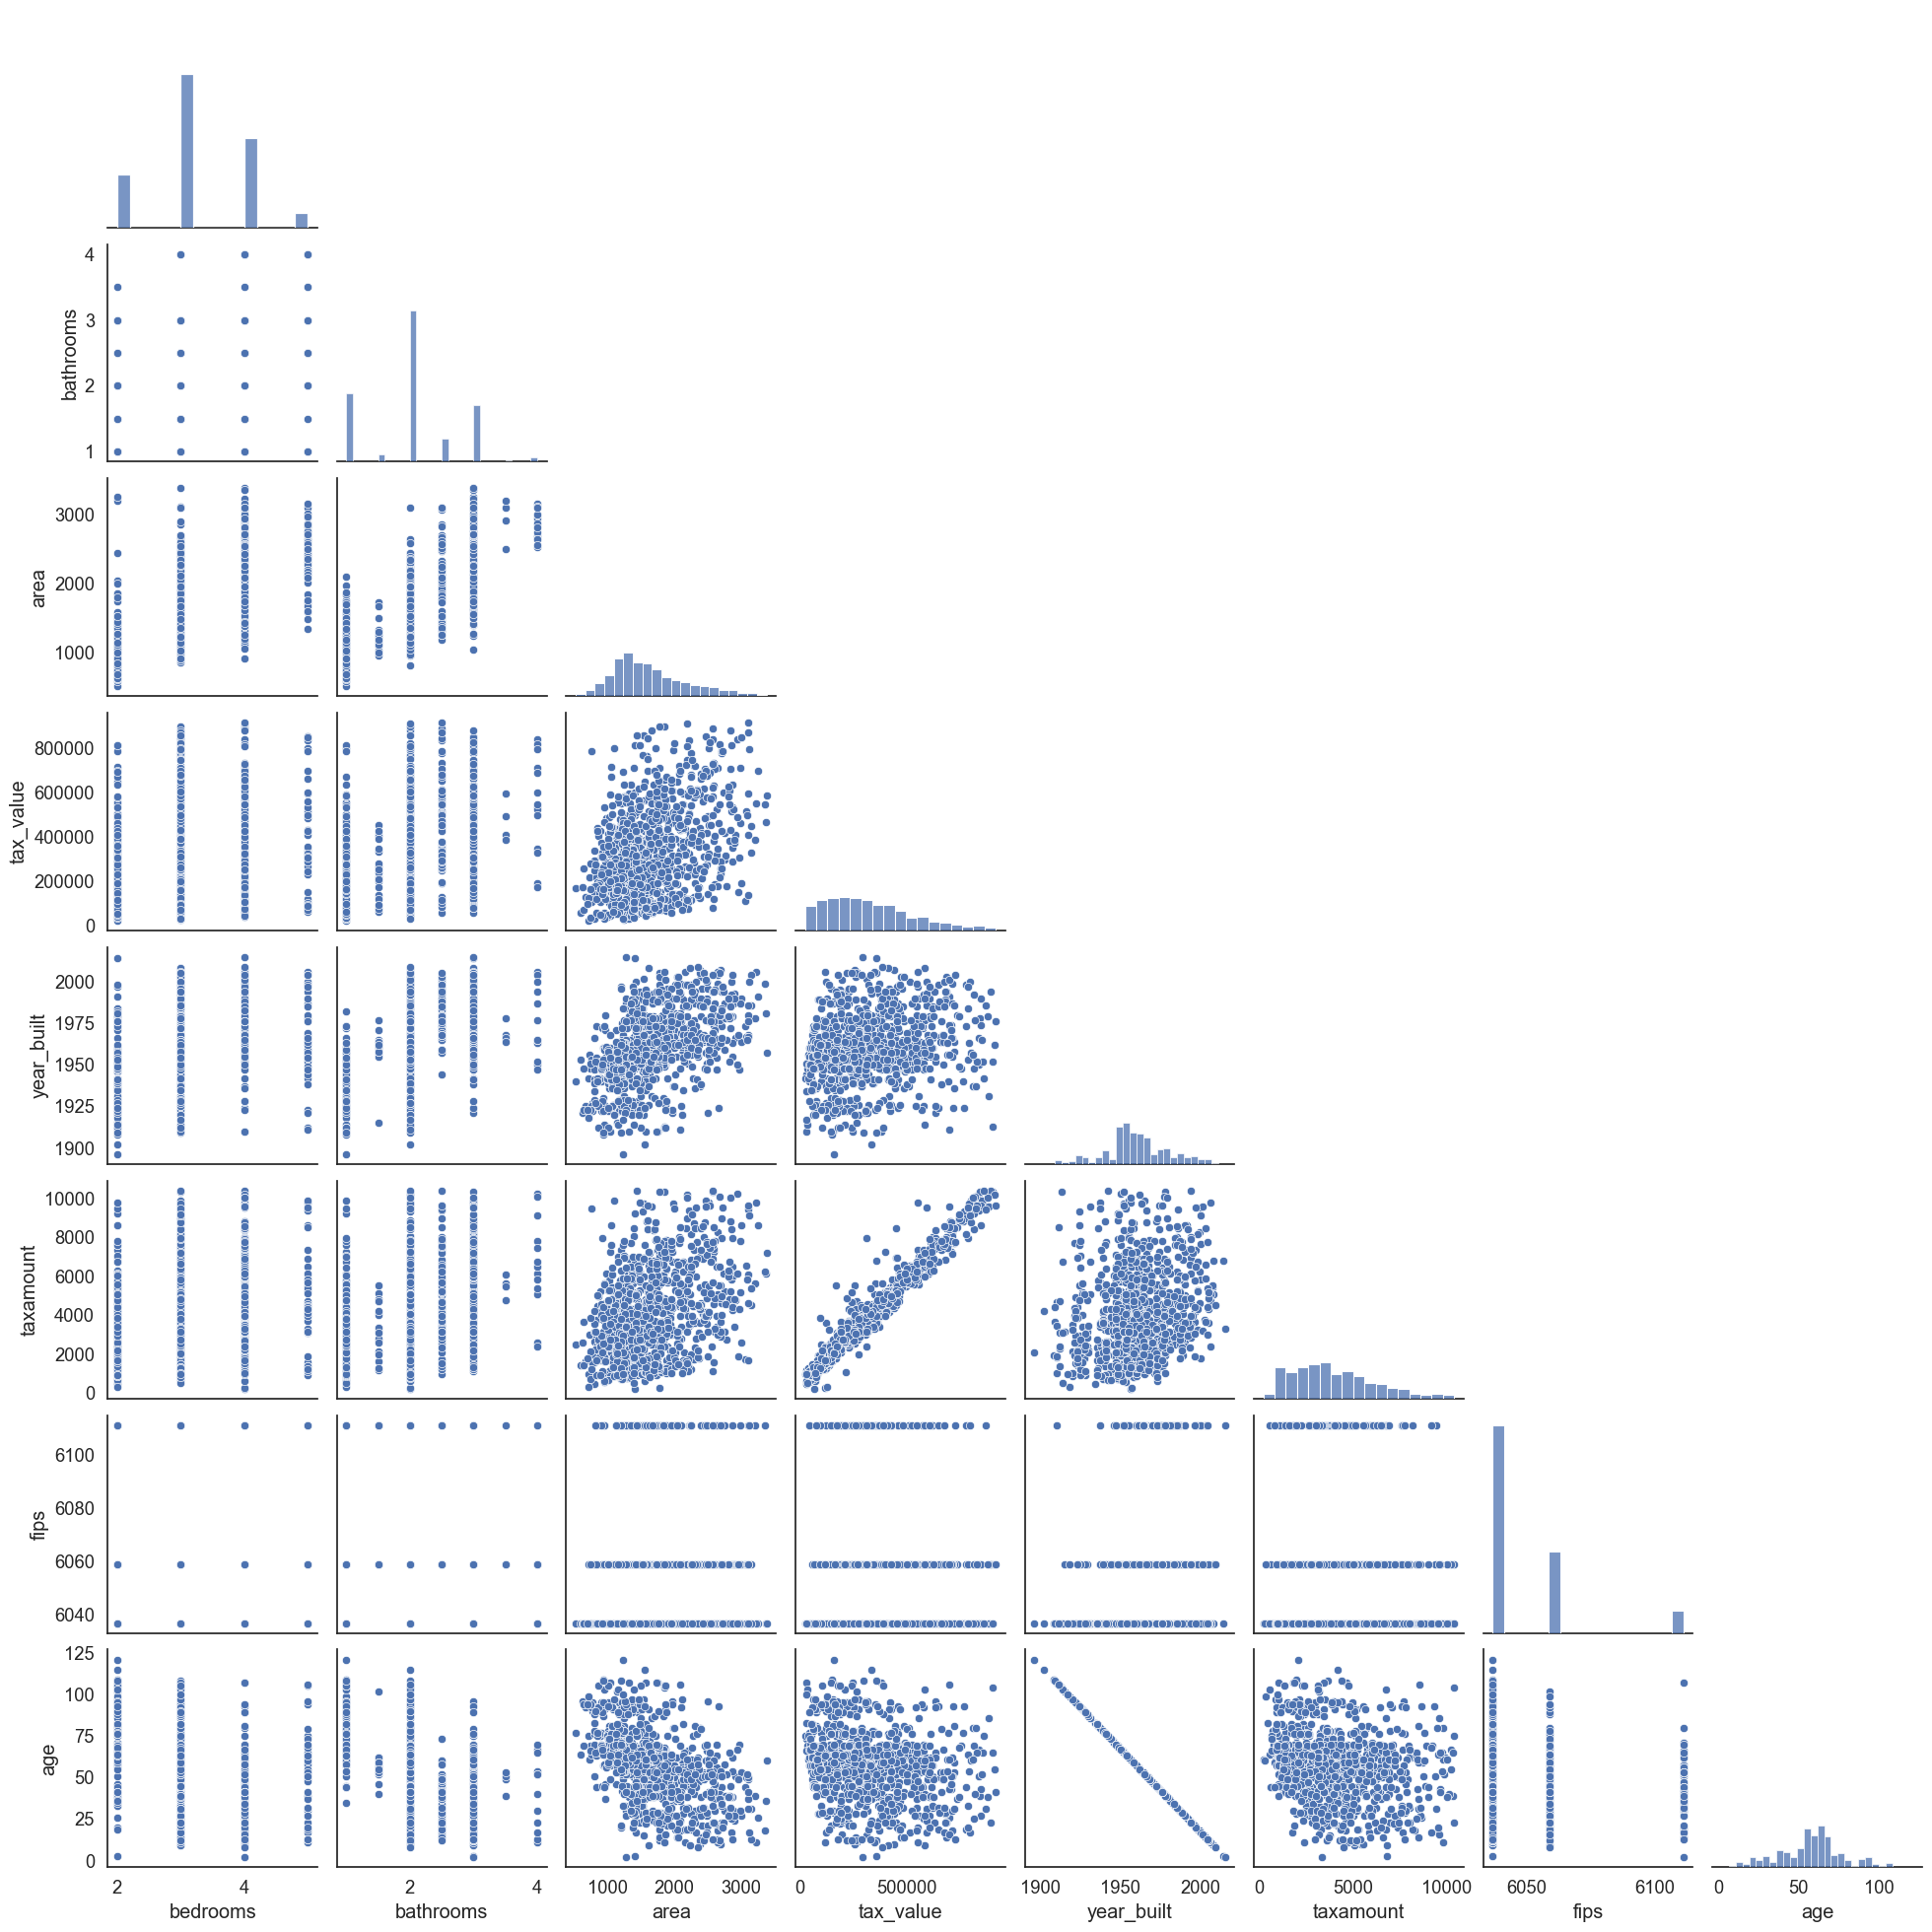

In [49]:
sns.pairplot(train,corner=True)
plt.show()

In [50]:
train.fips.value_counts()

6037.00    666
6059.00    261
6111.00     73
Name: fips, dtype: int64

fips         county,state
        
6037         Los Angeles County, California
        
6059         Orange County, California
        
6111         Ventura County, California

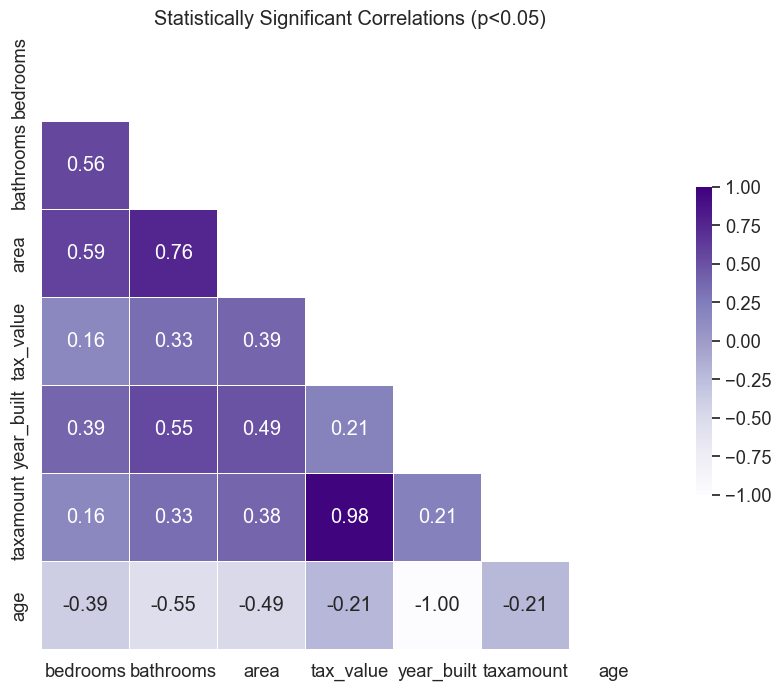

In [19]:
evaluate.visualize_corr(train.drop(columns= 'fips'))

In [24]:
train_w_dummies = pd.get_dummies(train)

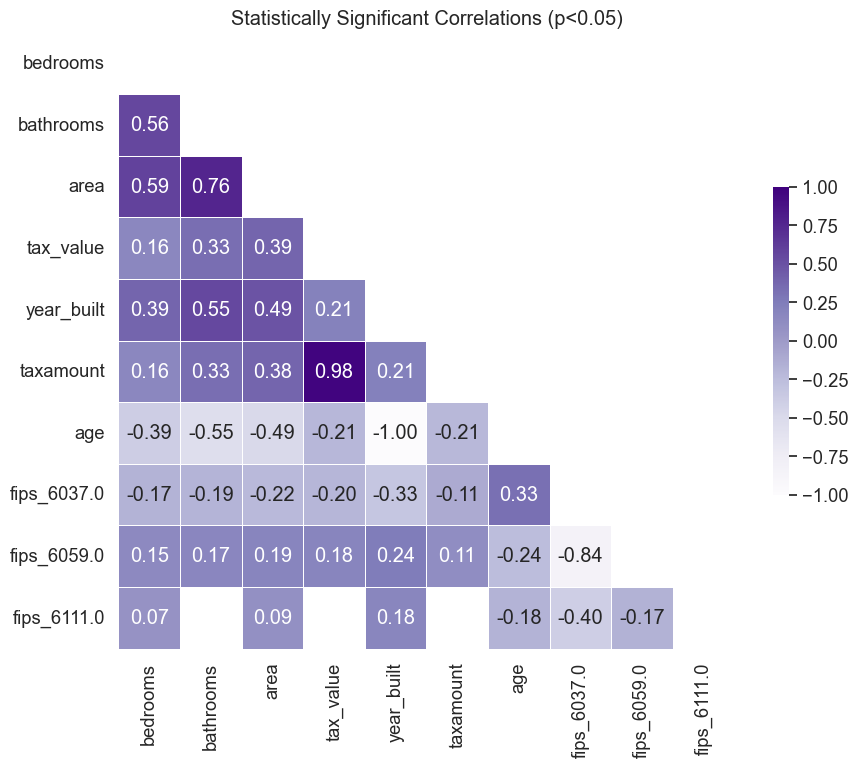

In [27]:
evaluate.visualize_corr(train_w_dummies)

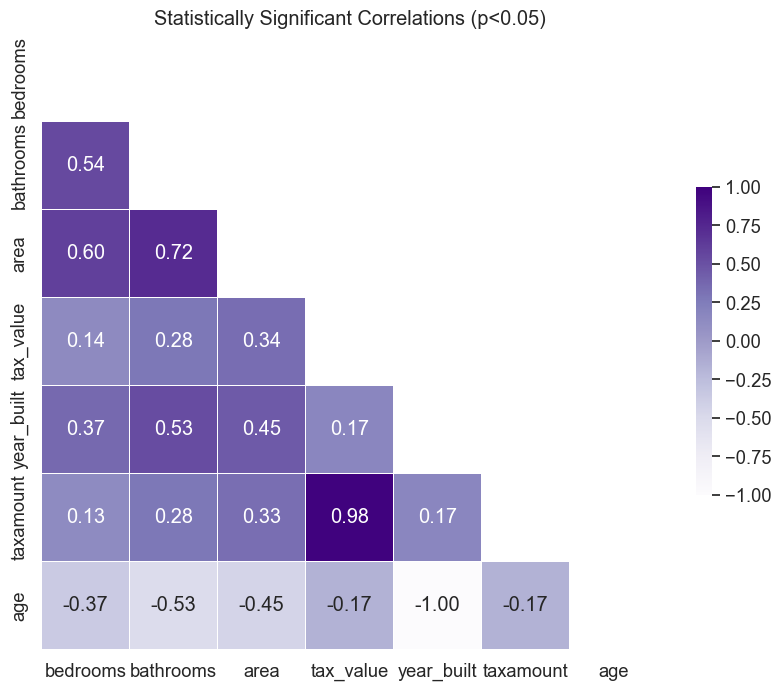

In [39]:
evaluate.visualize_corr(wrangle.remove_outliers(train, k=0.95,col_list= ['area']).drop(columns = 'fips'))

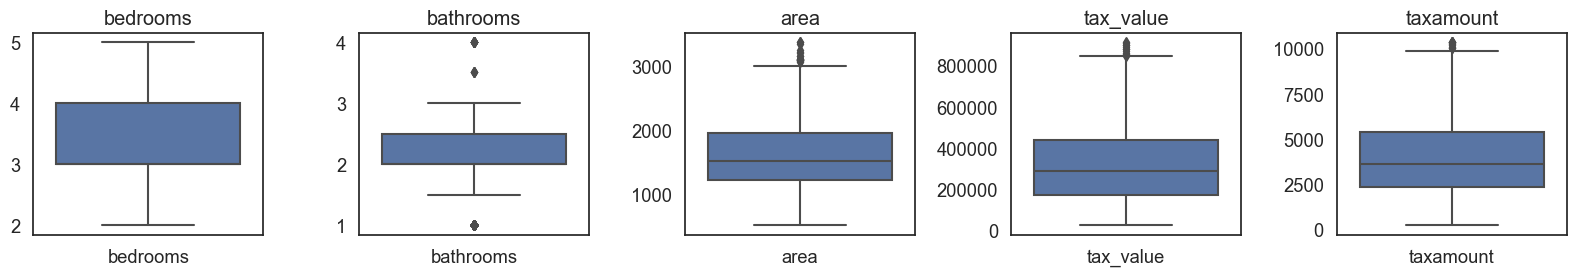

In [28]:
wrangle.get_box(train)

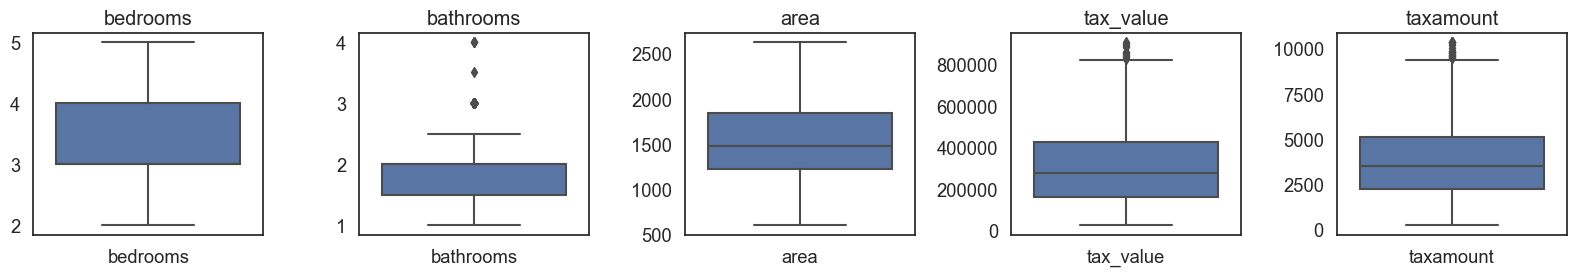

In [36]:
wrangle.get_box().wrangle.remove_outliers(train, k=0.95,col_list= ['area']))

In [34]:
wrangle.remove_outliers(train, k=0.95, col_list= ['area'])

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
1158290,3.00,2.00,1612.00,518016.00,1955.00,6567.84,6037.00,62.00
644231,4.00,2.00,1805.00,573616.00,1972.00,6843.24,6059.00,45.00
1459488,2.00,1.00,1218.00,182417.00,1951.00,2680.17,6037.00,66.00
2149989,3.00,2.50,1885.00,358469.00,1965.00,4410.72,6059.00,52.00
185697,3.00,2.00,1477.00,229000.00,1994.00,3575.09,6037.00,23.00
...,...,...,...,...,...,...,...,...
1102956,4.00,3.00,2534.00,454686.00,1976.00,5132.83,6037.00,41.00
826469,2.00,2.00,1151.00,408901.00,1953.00,5081.66,6059.00,64.00
337324,3.00,2.00,1230.00,32666.00,1917.00,997.65,6037.00,100.00
796028,4.00,3.00,2259.00,400005.00,1994.00,3962.52,6059.00,23.00


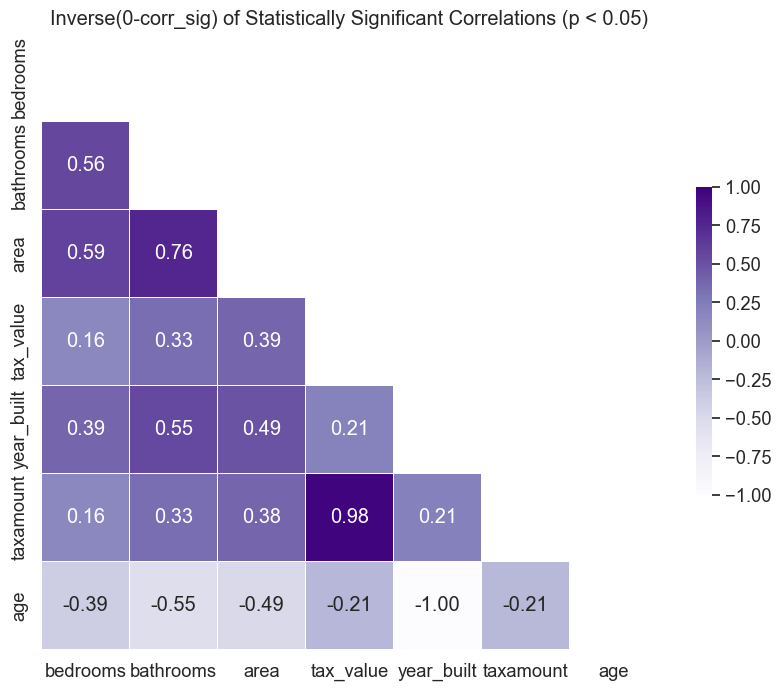

In [56]:
    # Create correlation matrix
    corr = train.drop(columns=['fips']).corr()

    # Mask upper triangle of matrix (redundant information)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Get statistically significant correlations (p-value < sig_level)
    pvals = train.drop(columns=['fips']).apply(lambda x: train.drop(columns=['fips']).apply(lambda y: stats.pearsonr(x, y)[1]))
    sig = (pvals < 0.05).values
    corr_sig = corr.mask(~sig)

    # Set up plot
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1.2)
    sns.set_style("white")

    # Create heatmap with statistically significant correlations
    sns.heatmap((corr), cmap='Purples', annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(f"Inverse(0-corr_sig) of Statistically Significant Correlations (p < 0.05)")
    plt.show()

In [57]:
def visualize_p(df, sig_level=0.05, figsize=(10,8)):
    """
    Takes a Pandas dataframe and a significance level, and creates a heatmap of 
    statistically significant correlations between the variables.
    """
    # Create matrix of P-values
    pvals = df.corr().apply(lambda x: df.corr().apply(lambda y: abs(stats.pearsonr(x, y)[1])))

    # Mask upper triangle of matrix (redundant information)
    mask = np.triu(np.ones_like(pvals, dtype=bool))

    # Get statistically significant correlations (p-value < sig_level)
    sig = (pvals < sig_level).values
    pvals_sig = pvals.mask(~sig)

    # Set up plot
    plt.figure(figsize=figsize)
    sns.set(font_scale=1.2)
    sns.set_style("white")

    # Create heatmap with statistically significant correlations
    sns.heatmap(pvals_sig, cmap='Purples', annot=True, fmt=".2f", mask=mask, vmin=0, vmax=sig_level, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(f"P-values for Statistically Significant Correlations (p<{sig_level})")
    plt.show()

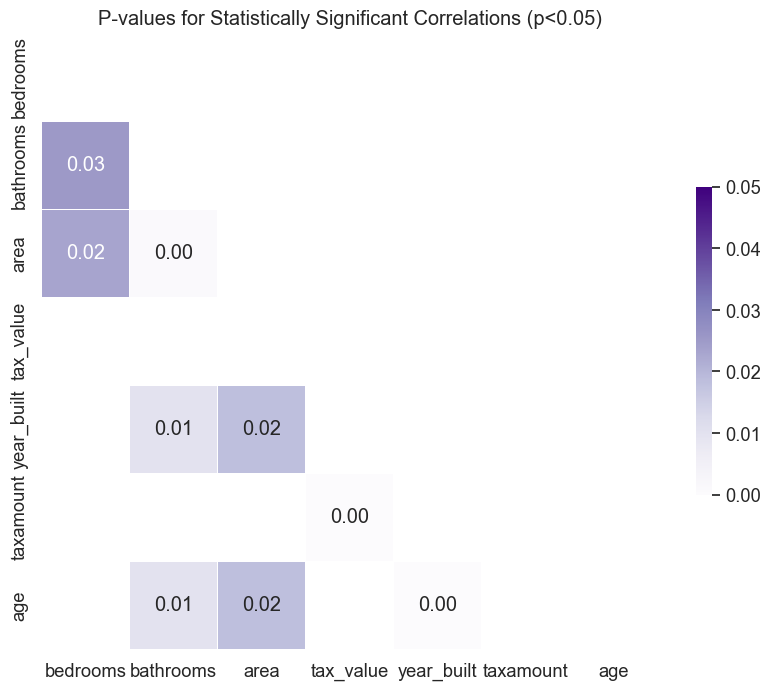

In [58]:
visualize_p(train)

In [61]:
def print_corr_table(df, target):
    """
    Takes a Pandas dataframe and a target variable name, and prints a table of 
    correlation coefficients and p-values ordered by highest to lowest correlation coefficient.
    """
    # Create correlation matrix and extract correlation coefficients for target variable
    corr = df.corr()
    corr_target = corr[target]

    # Calculate P-values for all correlations
    pvals = df.apply(lambda x: df.apply(lambda y: stats.pearsonr(x, y)[1]))

    # Combine correlation coefficients and P-values into a single dataframe
    corr_table = pd.concat([corr_target, pvals[target]], axis=1)
    corr_table.columns = ["corr_coef", "p_value"]
    
    # Sort table by absolute correlation coefficient (in descending order)
    corr_table["abs_corr_coef"] = corr_table["corr_coef"].abs()
    corr_table = corr_table.sort_values("abs_corr_coef", ascending=False)
    corr_table = corr_table.drop(columns=["abs_corr_coef"])

    # Print table
    print("Correlation Coefficients and P-Values:")
    print(corr_table)

In [64]:
print_corr_table(pd.get_dummies(train, columns=['fips']),'tax_value')

Correlation Coefficients and P-Values:
             corr_coef  p_value
tax_value         1.00     0.00
taxamount         0.98     0.00
area              0.39     0.00
bathrooms         0.33     0.00
year_built        0.21     0.00
age              -0.21     0.00
fips_6037.0      -0.20     0.00
fips_6059.0       0.18     0.00
bedrooms          0.16     0.00
fips_6111.0       0.06     0.07
